# **New York City TLC Statistical Data Analysis**

### **Imports and data loading**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Inspect and analyze data

In [2]:
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [4]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [5]:
# Sort the data by trip distance from maximum to minimum value
df.sort_values(by='trip_distance',ascending=False)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,63574825,1,07/26/2017 10:26:58 PM,07/26/2017 10:26:58 PM,1,0.00,1,N,162,264,2,5.50,0.5,0.5,0.00,0.00,0.3,6.80
15916,47368116,1,06/29/2017 7:30:30 PM,06/29/2017 7:43:29 PM,1,0.00,1,N,79,148,3,8.50,1.0,0.5,0.00,0.00,0.3,10.30
1350,91619825,2,10/30/2017 8:20:29 AM,10/30/2017 8:20:38 AM,1,0.00,1,N,193,193,1,2.50,0.0,0.5,0.66,0.00,0.3,3.96
246,78660848,1,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,1,0.00,1,N,145,145,2,2.50,0.5,0.5,0.00,0.00,0.3,3.80


In [6]:
# Sort the data by total amount and print the top 20 values
df.sort_values(by=['total_amount'],ascending=False).head(20)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8476,11157412,1,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29
20312,107558404,2,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
12511,107108848,2,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74
15474,55538852,2,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
16379,101198443,2,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,1,25.50,5,N,132,265,2,140.00,0.0,0.5,0.00,16.26,0.3,157.06
3582,111653084,1,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,1,7.30,5,N,1,1,1,152.00,0.0,0.0,0.00,0.00,0.3,152.30
11269,51920669,1,06/19/2017 12:51:17 AM,06/19/2017 12:52:12 AM,2,0.00,5,N,265,265,1,120.00,0.0,0.0,20.00,11.52,0.3,151.82
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30


In [7]:
# Sort the data by total amount and print the bottom 20 values
df.sort_values(by=['total_amount'],ascending=True).head(20)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
12944,29059760,2,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,1,0.17,5,N,138,138,4,-120.00,0.0,0.0,0.0,0.0,-0.3,-120.30
20698,14668209,2,02/24/2017 12:38:17 AM,02/24/2017 12:42:05 AM,1,0.70,1,N,65,25,4,-4.50,-0.5,-0.5,0.0,0.0,-0.3,-5.80
17602,24690146,2,03/24/2017 7:31:13 PM,03/24/2017 7:34:49 PM,1,0.46,1,N,87,45,4,-4.00,-1.0,-0.5,0.0,0.0,-0.3,-5.80
11204,58395501,2,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,1,0.64,1,N,50,48,3,-4.50,0.0,-0.5,0.0,0.0,-0.3,-5.30
14714,109276092,2,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,5,0.40,1,N,164,161,4,-4.00,-0.5,-0.5,0.0,0.0,-0.3,-5.30
8204,91187947,2,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,1,0.41,1,N,236,237,3,-3.50,-0.5,-0.5,0.0,0.0,-0.3,-4.80
20317,75926915,2,09/09/2017 10:59:51 PM,09/09/2017 11:02:06 PM,1,0.24,1,N,116,116,4,-3.50,-0.5,-0.5,0.0,0.0,-0.3,-4.80
10281,55302347,2,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,2,0.00,1,N,238,238,4,-2.50,-1.0,-0.5,0.0,0.0,-0.3,-4.30
5448,28459983,2,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,1,0.25,1,N,90,68,3,-3.50,0.0,-0.5,0.0,0.0,-0.3,-4.30
4423,97329905,2,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,2,0.06,1,N,237,237,4,-3.00,-0.5,-0.5,0.0,0.0,-0.3,-4.30


In [8]:
# How many of each payment type are represented in the data?
df.payment_type.value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

According to the data dictionary, the payment method was encoded as follows:

1 = Credit card  
2 = Cash  
3 = No charge  
4 = Dispute  
5 = Unknown  
6 = Voided trip

In [9]:
# What is the average tip for trips paid for with credit card?
df[df['payment_type']==1].tip_amount.mean()

2.7298001965280054

In [10]:
# What is the average tip for trips paid for with cash?
df[df['payment_type']==2].tip_amount.mean()

0.0

In [11]:
# How many times is each vendor ID represented in the data?
df.VendorID.value_counts()

VendorID
2    12626
1    10073
Name: count, dtype: int64

In [12]:
# What is the mean total amount for each vendor?
df.groupby(['VendorID'])[['total_amount']].mean()

,total_amount
VendorID,
1,16.298119
2,16.320382


In [13]:
# Filter the data for credit card payments only
df[df['payment_type']==1]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,07/16/2017 3:22:51 AM,07/16/2017 3:40:52 AM,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35
22693,67858616,2,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [14]:
# Filter the credit-card-only data for passenger count only
df[df['payment_type']==1][['payment_type','passenger_count']]

,payment_type,passenger_count
0,1,6
1,1,1
2,1,1
3,1,1
5,1,6
...,...,...
22692,1,1
22693,1,1
22695,1,1
22697,1,1


In [15]:
# Calculate the average tip amount for each passenger count (credit card payments only)
df[df['payment_type']==1].groupby(['passenger_count'])[['total_amount']].mean()

,total_amount
passenger_count,
0,19.529630
1,17.483811
2,18.728132
3,17.649317
4,17.617865
5,17.416813
6,17.279911


In [16]:
df[df['payment_type']==1].passenger_count.value_counts()

passenger_count
1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: count, dtype: int64

##  Exploratory data analysis

In [17]:
# Convert data columns to datetime

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [18]:
df.shape

(22699, 18)

In [19]:
df.drop_duplicates().shape

(22699, 18)

In [20]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


**trip distance**

<Axes: xlabel='trip_distance'>

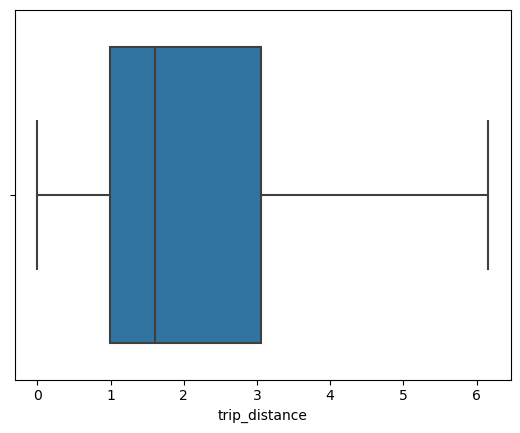

In [21]:
# Create box plot of trip_distance
sns.boxplot(x=df['trip_distance'],showfliers=False)

<Axes: >

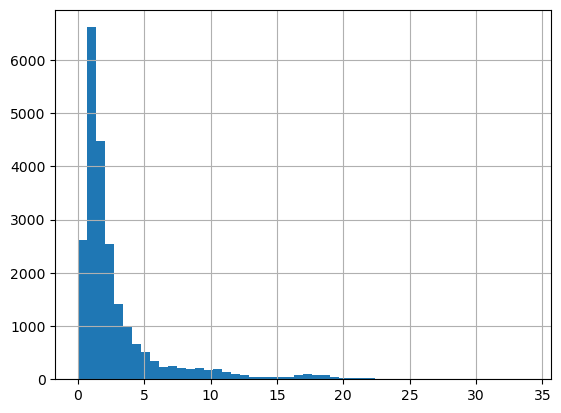

In [22]:
# Create histogram of trip_distance
df['trip_distance'].hist(bins=50)

**total amount**

<Axes: xlabel='total_amount'>

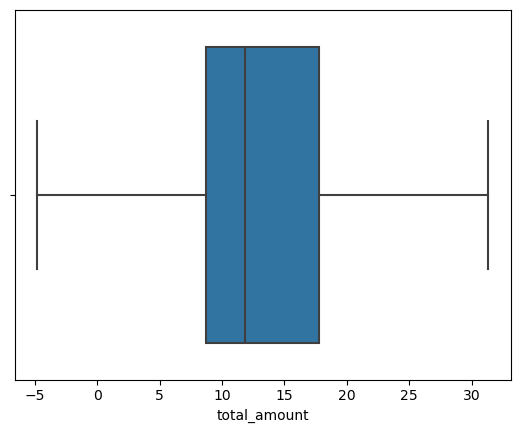

In [23]:
# Create box plot of total_amount
sns.boxplot(x=df['total_amount'],showfliers=False)

<Axes: >

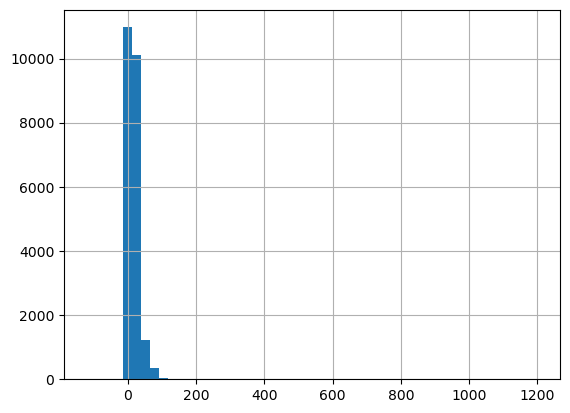

In [24]:
# Create histogram of total_amount
df['total_amount'].hist(bins=50)

**tip amount**

<Axes: xlabel='tip_amount'>

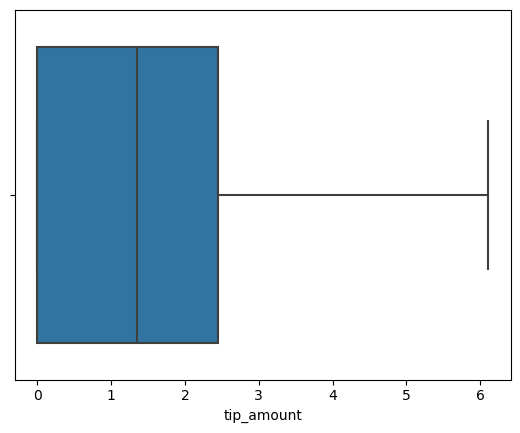

In [25]:
# Create box plot of tip_amount
sns.boxplot(x=df['tip_amount'], showfliers=False)

<Axes: >

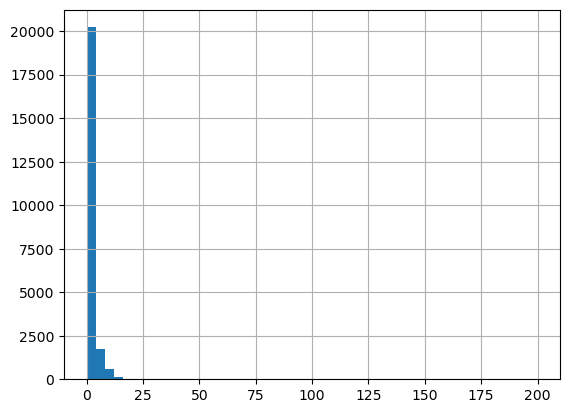

In [26]:
# Create histogram of tip_amount
df['tip_amount'].hist(bins=50)

**tip_amount by vendor**

In [27]:
df.VendorID.unique()

array([2, 1])

/home/ik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tip_amount', ylabel='Count'>

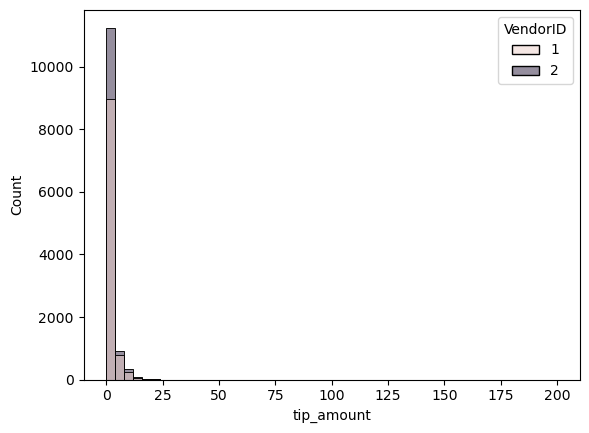

In [28]:
# Create histogram of tip_amount by vendor
sns.histplot(hue=df['VendorID'],x=df['tip_amount'],bins=50)

/home/ik/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tip_amount', ylabel='Count'>

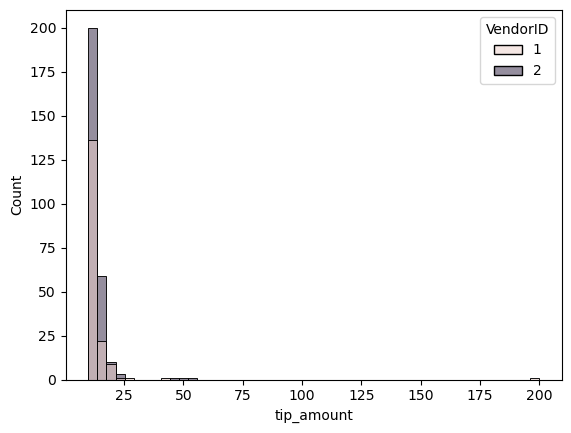

In [29]:
# Create histogram of tip_amount by vendor for tips > $10 
df_vendor_tip_gt_10 = df[df['tip_amount']>10]
sns.histplot(hue=df['VendorID'],x=df_vendor_tip_gt_10['tip_amount'],bins=50)

**Mean tips by passenger count**

In [30]:
# Examine the unique values in the `passenger_count` column.
df.passenger_count.value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [31]:
# Calculate mean tips by passenger_count
avg_tip_by_passenger_count = df.groupby('passenger_count')['tip_amount'].mean()
avg_tip_by_passenger_count

passenger_count
0    2.135758
1    1.848920
2    1.856378
3    1.716768
4    1.530264
5    1.873185
6    1.720260
Name: tip_amount, dtype: float64

Text(0, 0.5, 'average tip')

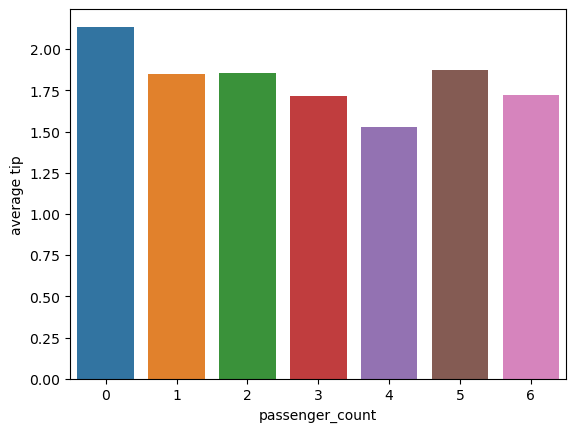

In [32]:
# Create bar plot for mean tips by passenger count
sns.barplot(x=avg_tip_by_passenger_count.index,y=avg_tip_by_passenger_count)
plt.ylabel('average tip')

**Create month and day columns**

In [33]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b')
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.strftime('%a')
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,Mar,Sat
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,Apr,Tue
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,Dec,Fri
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sun
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,Apr,Sat


**Plot total ride count by month**

Begin by calculating total ride count by month.

In [34]:
# Get total number of rides for each month
rides_per_month = df.groupby('month').agg(ride_count=pd.NamedAgg(column='tpep_pickup_datetime',aggfunc='count'))\
                                     .sort_values(by='ride_count',ascending=False)
rides_per_month

,ride_count
month,
Mar,2049
Oct,2027
Apr,2019
May,2013
Jan,1997
Jun,1964
Dec,1863
Nov,1843
Feb,1769


In [35]:
# Show the index
rides_per_month.index

Index(['Mar', 'Oct', 'Apr', 'May', 'Jan', 'Jun', 'Dec', 'Nov', 'Feb', 'Sep',
       'Aug', 'Jul'],
      dtype='object', name='month')

In [36]:
# Reorder the monthly ride list so months go in order
month_ord = pd.Index(['Jan','Feb', 'Mar','Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
rides_per_month = rides_per_month.reindex(month_ord )

<Axes: ylabel='ride_count'>

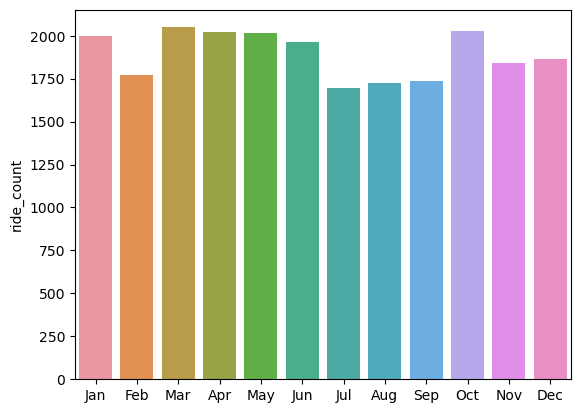

In [37]:
# Create a bar plot of total rides per month
sns.barplot(x=rides_per_month.index, y=rides_per_month['ride_count'])

**Plot total ride count by day**

Repeat the above process, but now calculate the total rides by day of the week.

In [38]:
# Repeat the above process, this time for rides by day
ride_by_day = df.groupby('day').agg(ride_count=pd.NamedAgg(column='tpep_pickup_datetime',aggfunc='count'))
ride_by_day.index

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object', name='day')

In [39]:
day_ord = pd.Index(['Mon','Tue', 'Wed', 'Thu', 'Fri',  'Sat', 'Sun'])
ride_by_day = ride_by_day.reindex(day_ord)
ride_by_day

,ride_count
Mon,2931
Tue,3198
Wed,3390
Thu,3402
Fri,3413
Sat,3367
Sun,2998


<Axes: ylabel='ride_count'>

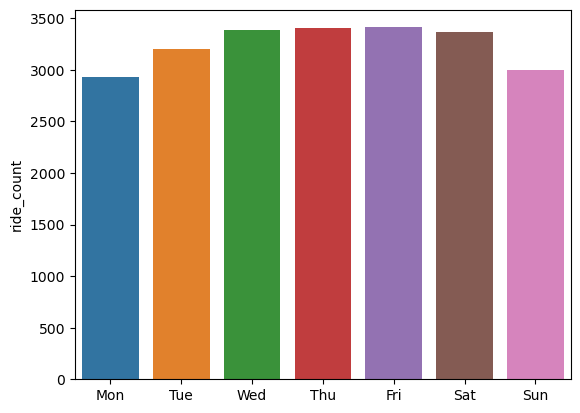

In [40]:
# Create bar plot for ride count by day
sns.barplot(x = ride_by_day.index, y = ride_by_day['ride_count'])

**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

In [41]:
# Repeat the process, this time for total revenue by day
revenue_by_day = df.groupby('day').agg(total_revenue = pd.NamedAgg(column='total_amount',aggfunc='sum'))
revenue_by_day = revenue_by_day.reindex(day_ord)
revenue_by_day

,total_revenue
Mon,49574.37
Tue,52527.14
Wed,55310.47
Thu,57181.91
Fri,55818.74
Sat,51195.40
Sun,48624.06


<Axes: ylabel='total_revenue'>

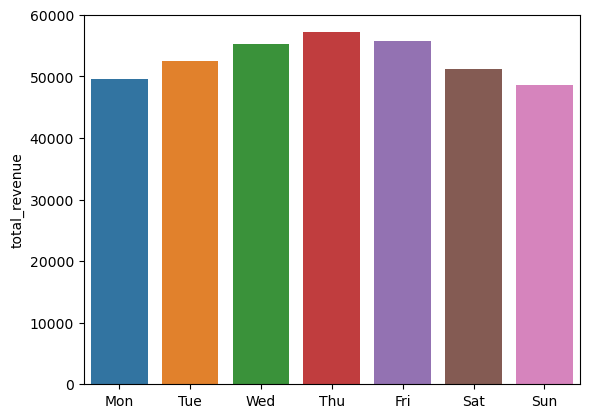

In [42]:
# Create bar plot of total revenue by day
sns.barplot(x=revenue_by_day.index,y=revenue_by_day['total_revenue'])

**Plot total revenue by month**

In [43]:
# Repeat the process, this time for total revenue by month
revenue_by_month = df.groupby('month').agg(total_revenue=pd.NamedAgg(column='total_amount',aggfunc='sum'))
revenue_by_month = revenue_by_month.reindex(month_ord)
revenue_by_month

,total_revenue
Jan,31735.25
Feb,28937.89
Mar,33085.89
Apr,32012.54
May,33828.58
Jun,32920.52
Jul,26617.64
Aug,27759.56
Sep,28206.38
Oct,33065.83


<Axes: ylabel='total_revenue'>

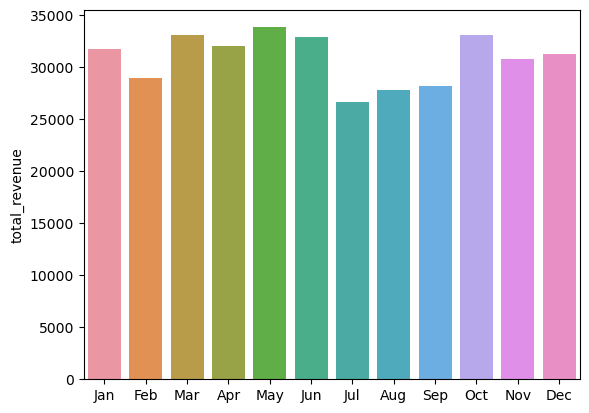

In [44]:
# Create a bar plot of total revenue by month
sns.barplot(x=revenue_by_month.index, y=revenue_by_month['total_revenue'])

**Plot mean trip distance by drop-off location**

In [45]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,Mar,Sat
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,Apr,Tue
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,Dec,Fri
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sun
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,Apr,Sat


In [46]:
# Get number of unique drop-off location IDs
df.DOLocationID.value_counts()

DOLocationID
161    858
236    802
230    761
237    759
170    699
      ... 
219      1
18       1
31       1
147      1
201      1
Name: count, Length: 216, dtype: int64

In [47]:
# Calculate the mean trip distance for each drop-off location
avg_dist_for_dropoff_loc = df.groupby('DOLocationID')['trip_distance'].mean()
avg_dist_for_dropoff_loc

DOLocationID
1      17.027353
4       2.436634
7       3.964944
9       9.305000
10      3.750000
         ...    
261     4.935897
262     2.866897
263     2.501951
264     2.928783
265    11.039000
Name: trip_distance, Length: 216, dtype: float64

In [48]:
# Sort the results in descending order by mean trip distance
avg_dist_for_dropoff_loc.sort_values(ascending=False)

DOLocationID
23     24.275000
29     21.650000
210    20.500000
11     17.945000
51     17.310000
         ...    
137     1.818852
234     1.727806
237     1.555494
193     1.390556
207     1.200000
Name: trip_distance, Length: 216, dtype: float64

In [49]:
avg_dist_for_dropoff_loc = avg_dist_for_dropoff_loc.sort_values()
avg_dist_for_dropoff_loc

DOLocationID
207     1.200000
193     1.390556
237     1.555494
234     1.727806
137     1.818852
         ...    
51     17.310000
11     17.945000
210    20.500000
29     21.650000
23     24.275000
Name: trip_distance, Length: 216, dtype: float64

In [50]:
avg_dist_for_dropoff_loc.index

Index([207, 193, 237, 234, 137, 100, 236, 186, 249,  34,
       ...
       183, 259,  86, 219,   1,  51,  11, 210,  29,  23],
      dtype='int64', name='DOLocationID', length=216)

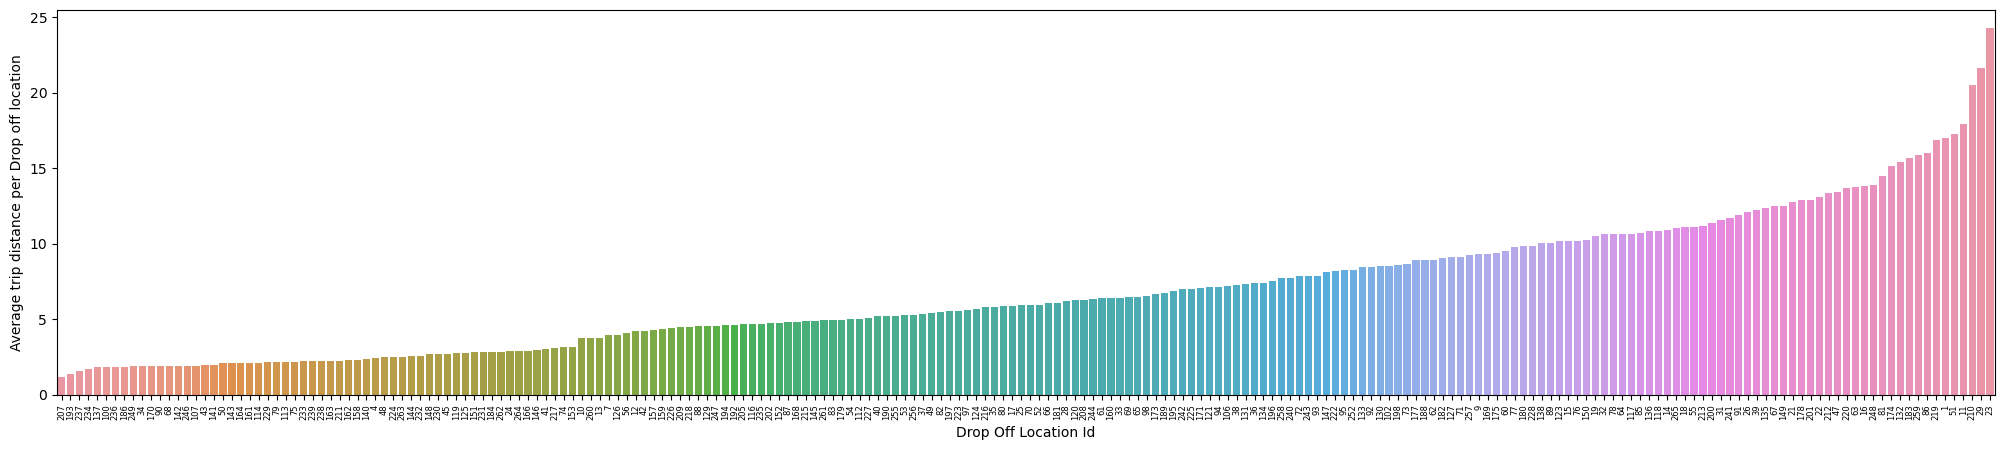

In [51]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(25,5))
sns.barplot(x=avg_dist_for_dropoff_loc.index, y=avg_dist_for_dropoff_loc,order=avg_dist_for_dropoff_loc.index)
plt.xticks(rotation=90, fontsize=6)
plt.ylabel('Average trip distance per Drop off location')
plt.xlabel('Drop Off Location Id')
plt.show()

### BONUS CONTENT

To confirm your conclusion, consider the following experiment:
1. Create a sample of coordinates from a normal distribution&mdash;in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
2. Calculate the distance between each pair of coordinates 
3. Group the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with
4. Plot the mean distance for each unique endpoint

In [52]:
#1. Generate random points on a 2D plane from a normal distribution


In [53]:
# 2. Calculate Euclidean distances between points in first half and second half of array


In [54]:
# 3. Group the coordinates by "drop-off location", compute mean distance


In [55]:
# 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to


**Histogram of rides by drop-off location**

In [56]:
# Check if all drop-off locations are consecutively numbered


In [57]:
# To eliminate the spaces in the historgram that these missing numbers would create, 
# sort the unique drop-off location values, then convert them to strings. This will 
# make the histplot function display all bars directly next to each other.


# DOLocationID column is numeric, so sort in ascending order


# Convert to string


# Plot


## Statistical analysis

Apply descriptive statistics and hypothesis testing in Python. The goal for this A/B test is to sample data and analyze whether there is a relationship between payment type and fare amount. For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.



In [58]:
from scipy import stats

In [59]:
df[['payment_type','fare_amount']].describe()

,payment_type,fare_amount
count,22699.000000,22699.000000
mean,1.336887,13.026629
std,0.496211,13.243791
min,1.000000,-120.000000
25%,1.000000,6.500000
50%,1.000000,9.500000
75%,2.000000,14.500000
max,4.000000,999.990000


In [60]:
avg_amount_by_payment_type = df.groupby('payment_type')[['fare_amount']].mean()
avg_amount_by_payment_type

,fare_amount
payment_type,
1,13.429748
2,12.213546
3,12.186116
4,9.913043


**Note:** In the dataset, `payment_type` is encoded in integers:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown



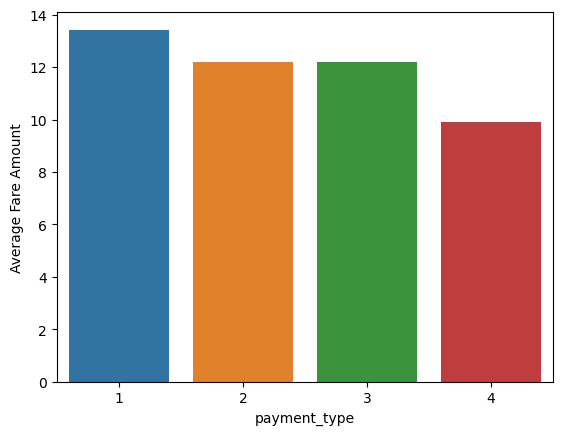

In [61]:
sns.barplot(x=avg_amount_by_payment_type.index,y=avg_amount_by_payment_type['fare_amount'])
plt.ylabel('Average Fare Amount')
plt.show()

In [62]:
payment_by_credit = df[df['payment_type']==1]
payment_by_cash = df[df['payment_type']==2]

sample_payment_by_credit = payment_by_credit.sample(n=50,replace=False,random_state=42)
sample_payment_by_cash = payment_by_cash.sample(n=50, replace=False,random_state=42)

sample_payment_by_credit['fare_amount'].mean(), sample_payment_by_cash['fare_amount'].mean()

(12.96, 11.04)

In [63]:
sample_payment_by_credit['fare_amount'].mean() - sample_payment_by_cash['fare_amount'].mean()

1.9200000000000017

**Hypothesis testing**

Steps for conducting a hypothesis test:

1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis 

$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

In [64]:
significance_level = 0.05
ttest = stats.ttest_ind(a=sample_payment_by_credit['fare_amount'], b=sample_payment_by_cash['fare_amount'],equal_var=False)
ttest

TtestResult(statistic=1.0031616323091894, pvalue=0.3183791035130837, df=93.24365491731349)

In [65]:
if ttest.pvalue < significance_level:
    print('Reject the null hypothesis')
elif ttest.pvalue > significance_level:
    print('Failed to reject the null hypothesis')

Failed to reject the null hypothesis
